In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:14pt;}
div.output {font-size:14pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:14pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:14pt;padding:5px;}
table.dataframe{font-size:14px;}
</style>
"""))

# 1. tensorflow v2.xx에서 v1사용하기

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  # tensorflow V2 비활성화하고 v1활성화
import numpy as np
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term


## Tensorflow
- 데이터 흐름 그래프(tensor 객체의 흐름)을 사용하는 수치 계산 라이브러리
- 그래프는 node(연산)와 edge로 구성
- sess = tf.Session()을 이용해서 실행 환경
- sess.run()을 통해서 실행 결과를 확인
- https://chaaany.tistory.com/306

In [8]:
# 1단계 : tensor(상수 노드 하나) 정의
node1 = tf.constant('Hello, Tensorflow')
# 2단계 : 세션(연산을 실행하는 환경) 생성
sess = tf.Session()
# 3단계 : 실제 실행
print(sess.run(node1))
print(sess.run(node1).decode())

b'Hello, Tensorflow'
Hello, Tensorflow


In [11]:
# 간단한 연산 tensor 그래프
# 1. 그래프 정의
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
# 2. 세션 생성
sess = tf.Session()
# 3. 세션 실행 & 결과
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [12]:
# 타입변경
import numpy as np
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float16)
sess = tf.Session()
print(sess.run([node1, node2]))

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float16)]


In [13]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1.,2.,3.,4.])
m = tf.reduce_mean(data)
sess = tf.Session()
print(sess.run(m))

2


In [14]:
# tf.random_normal([size]): 평균이 0이고 표준편차가 1인 난수 size개 발생
w = tf.random_normal([3])
sess = tf.Session()
print(sess.run(w))

[-1.202876    1.8661578   0.52913326]


In [15]:
# 변수 노드 # 계속 미분해서 값을 변경해야해서
w = tf.Variable(tf.random_normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # 변수 초기화
sess.run(w)

array([0.14914541], dtype=float32)

# 2. tensorflow v1을 이용한 회귀분석 구현
## 2.1 독립변수 x가 1개, 타겟(종속)변수 y가 1개

In [16]:
# tensor 그래프 정의
# 데이터 셋 확보
x = np.array([1,2,3])
y = np.array([2,3,4])
# weight와 bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hat, Hypothesis(가설) 모델의 예측값: 결과는 numpy 배열
H = W * x + b
# cost function (손실함수 : mse)  예측치와 실측치의 차이를 제곱하고 평균
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 W, b를 찾는 것
cost 함수는 2차함수이므로 곡선 그래프. 곡선위 미분값이 0이 되는 방향
(경사하강법 GradientDescent)
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# 세션 생성
sess = tf.Session()
# W, b 초기화
sess.run(tf.global_variables_initializer())
# 6000번 학습(v2에서의 fit함수)
for step in range(6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%300==0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step, cost_val, W_val, b_val))
# x값이 고정되어 있어 predict를 못한다.

0번째 cost:3.5727298259735107, W:[0.23041007], b:[0.9799147]
300번째 cost:0.0024215641897171736, W:[0.94298375], b:[1.1296115]
600번째 cost:0.0005713852006010711, W:[0.9723041], b:[1.0629592]
900번째 cost:0.00013482695794664323, W:[0.98654646], b:[1.0305831]
1200번째 cost:3.180988642270677e-05, W:[0.9934652], b:[1.0148551]
1500번째 cost:7.506545898650074e-06, W:[0.9968256], b:[1.0072162]
1800번째 cost:1.7713581428324687e-06, W:[0.99845785], b:[1.0035056]
2100번째 cost:4.1822889329523605e-07, W:[0.9992507], b:[1.0017033]
2400번째 cost:9.895565966644426e-08, W:[0.9996356], b:[1.0008284]
2700번째 cost:2.3540005500422012e-08, W:[0.99982226], b:[1.000404]
3000번째 cost:5.7308633394370645e-09, W:[0.9999124], b:[1.0001993]
3300번째 cost:1.4198491271599778e-09, W:[0.9999565], b:[1.0000993]
3600번째 cost:3.79410863837748e-10, W:[0.99997765], b:[1.0000514]
3900번째 cost:8.733517381509515e-11, W:[0.9999891], b:[1.0000248]
4200번째 cost:8.733517381509515e-11, W:[0.9999891], b:[1.0000248]
4500번째 cost:8.733517381509515e-11, W:[0

In [18]:
# 최종적으로 나온 회귀식 H=W*x + b
W_, b_ = sess.run([W,b])

(array([0.9999891], dtype=float32), array([1.0000248], dtype=float32))

In [19]:
def predict(x):
    return W_[0] * x + b_[0]

In [20]:
predict(5)

5.999970257282257

## 2.2 predict을 위한 placeholder이용
- placeholder : 외부에서 데이터를 입력받을 수 있는 노드
- H = W * x + b

In [22]:
x = tf.placeholder(dtype=tf.float32) # x를 외부에서 넣어 줄 수 있도록, x = np.array([1,2,3])는 고정된 값
H = 1*x + 1
sess = tf.Session()
sess.run([x,H], feed_dict={x : np.array([40,50])})

[array([40., 50.], dtype=float32), array([41., 51.], dtype=float32)]

In [23]:
# tensor 그래프 정의
# 데이터 셋 확보
x_data = np.array([1,2,3])
y_data = np.array([2,3,4])
# placeholder 설정(x,y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight와 bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hat, Hypothesis(가설) 모델의 예측값: 결과는 numpy 배열
H = W * x + b
# cost function (손실함수 : mse)  예측치와 실측치의 차이를 제곱하고 평균
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 W, b를 찾는 것
cost 함수는 2차함수이므로 곡선 그래프. 곡선위 미분값이 0이 되는 방향
(경사하강법 GradientDescent)
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# 세션 생성
sess = tf.Session()
# W, b 초기화
sess.run(tf.global_variables_initializer())
# 6000번 학습(v2에서의 fit함수)
for step in range(6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                        feed_dict={x:x_data,
                                                   y:y_data})
    if step%300==0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step, cost_val, W_val, b_val))

0번째 cost:19.58757209777832, W:[-0.7307174], b:[0.7882529]
300번째 cost:0.007212432101368904, W:[0.9016009], b:[1.2236844]
600번째 cost:0.0017018363578245044, W:[0.95220196], b:[1.1086562]
900번째 cost:0.0004015662707388401, W:[0.9767818], b:[1.0527805]
1200번째 cost:9.47499429457821e-05, W:[0.9887217], b:[1.0256381]
1500번째 cost:2.2357911802828312e-05, W:[0.99452144], b:[1.012454]
1800번째 cost:5.275508101476589e-06, W:[0.9973387], b:[1.0060498]
2100번째 cost:1.2450217354853521e-06, W:[0.9987071], b:[1.002939]
2400번째 cost:2.940217029845371e-07, W:[0.99937165], b:[1.0014282]
2700번째 cost:6.957734655088643e-08, W:[0.99969435], b:[1.0006948]
3000번째 cost:1.6551553017052356e-08, W:[0.9998507], b:[1.0003388]
3300번째 cost:4.0335712547800995e-09, W:[0.9999267], b:[1.0001674]
3600번째 cost:9.71093983004323e-10, W:[0.9999639], b:[1.000082]
3900번째 cost:2.665766773990441e-10, W:[0.9999813], b:[1.0000429]
4200번째 cost:8.710306781400945e-11, W:[0.9999891], b:[1.0000248]
4500번째 cost:8.710306781400945e-11, W:[0.9999891

In [26]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([5.9999704], dtype=float32)

## 2.3 scale 이 다른 데이터들의 회귀분석 구현(scale 조정x)

In [30]:
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([5,15,68,80,95])
# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis
H = W * x + b
# cost(손실함수)
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# 세션 & 변수(W, b) 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 6001):
    _, cost_val = sess.run([train, cost],feed_dict={x:x_data, y:y_data})
    if step%300==0:
        print("{}/6000번째 cost:{}".format(step+1, cost_val))

301/6000번째 cost:79.15251159667969
601/6000번째 cost:79.13980865478516
901/6000번째 cost:79.13945770263672
1201/6000번째 cost:79.13946533203125
1501/6000번째 cost:79.13945770263672
1801/6000번째 cost:79.13945007324219
2101/6000번째 cost:79.13944244384766
2401/6000번째 cost:79.13946533203125
2701/6000번째 cost:79.13946533203125
3001/6000번째 cost:79.13946533203125
3301/6000번째 cost:79.13946533203125
3601/6000번째 cost:79.13946533203125
3901/6000번째 cost:79.13946533203125
4201/6000번째 cost:79.13946533203125
4501/6000번째 cost:79.13946533203125
4801/6000번째 cost:79.13946533203125
5101/6000번째 cost:79.13946533203125
5401/6000번째 cost:79.13946533203125
5701/6000번째 cost:79.13946533203125
6001/6000번째 cost:79.13946533203125


## 2.4 scale이 다른 데이터들의 회귀분석 구현(scale 조정O)
### scale 조정방법 : 모든 데이터를 일정범위내로 조정
- normalization(정규화) : 모든 데이터를 0~1 사이로 조정 (최소값0, 최대값1이 되게)                      
-                        X -Xmin
    * normalization = ─────────────
                       Xmax - Xmin
    * 위의 식보다 라이브러리 추천(sklearn.preprocessing.MinMaxScaler)
- standardization(표준화) : 데이터의 평균을 0, 표준편차를 1로 조정
-                         X - Xmean
    * standardization = ──────────────
-                        Xstd(표준편차)
    * 위의 식보다 라이브러리 추천(sklearn.preprocessing.StandardScaler)

In [3]:
# 라이브러리 쓰지 않고 정규화
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])
#x_data.min(), x_data.max(), x_data.mean(), x_data.std()
norm_scaled_x_data = (x_data - x_data.min()) / (x_data.max() - x_data.min())
norm_scaled_y_data = (y_data - y_data.min()) / (y_data.max() - y_data.min())

In [4]:
# 라이브러리를 사용하여 정규화
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([5,15,68,80,95]).reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler   # MinMaxScaler - 변환모델을 만드는 클래스
scaler_x = MinMaxScaler()  # 독립변수 X를 정규화 시킬 객체
scaler_x.fit(x_data)
norm_scaled_x_data = scaler_x.transform(x_data)  

scaler_y = MinMaxScaler()  # 종속(타겟)변수 X를 정규화 시킬 객체
norm_scaled_y_data = scaler_y.fit_transform(y_data)
norm_scaled_y_data

array([[0.        ],
       [0.11111111],
       [0.7       ],
       [0.83333333],
       [1.        ]])

In [5]:
# 라이브러리 쓰지 않고 표준화하기
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])
stan_scaled_x_data = (x_data - x_data.mean()) / x_data.std()
stan_scaled_y_data = (y_data - y_data.mean()) / y_data.std()
np.column_stack([x_data, norm_scaled_x_data, stan_scaled_x_data])

array([[ 1.        ,  0.        , -1.22474487],
       [ 2.        ,  0.11111111, -0.93313895],
       [ 5.        ,  0.44444444, -0.05832118],
       [ 8.        ,  0.77777778,  0.81649658],
       [10.        ,  1.        ,  1.39970842]])

In [6]:
np.column_stack([y_data, norm_scaled_y_data, stan_scaled_y_data])

array([[ 5.        ,  0.        , -1.32373476],
       [15.        ,  0.11111111, -1.04563922],
       [68.        ,  0.7       ,  0.42826713],
       [80.        ,  0.83333333,  0.76198177],
       [95.        ,  1.        ,  1.17912508]])

In [7]:
# 라이브러리를 사용하여 표준화
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([5,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import StandardScaler   
scaler_x = StandardScaler()  # 독립변수 X를 표준화 시킬 객체
stan_scaled_x_data = scaler_x.fit_transform(x_data)  

scaler_y = StandardScaler()  # 종속(타겟)변수 X를 표준화 시킬 객체
stan_scaled_y_data = scaler_y.fit_transform(y_data)

In [8]:
# 스케일 조정된 데이터를 다시 복구 : inverse_transform()이용
scaler_y.inverse_transform(stan_scaled_y_data)

array([[ 5.],
       [15.],
       [68.],
       [80.],
       [95.]])

In [9]:
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([5,15,68,80,95])
# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis
H = W * x + b
# cost(손실함수)
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)
# 세션 & 변수(W, b) 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 6001):
    _, cost_val = sess.run([train, cost],feed_dict={x:norm_scaled_x_data, y:norm_scaled_y_data})
    if step%300==0:
        print("{}/6000번째 cost:{}".format(step, cost_val))

300/6000번째 cost:0.9506939053535461
600/6000번째 cost:0.22051939368247986
900/6000번째 cost:0.05717266723513603
1200/6000번째 cost:0.020604461431503296
1500/6000번째 cost:0.012395527213811874
1800/6000번째 cost:0.010533204302191734
2100/6000번째 cost:0.01009376160800457
2400/6000번째 cost:0.009975540451705456
2700/6000번째 cost:0.00993176456540823
3000/6000번째 cost:0.009906895458698273
3300/6000번째 cost:0.009888230822980404
3600/6000번째 cost:0.009872662834823132
3900/6000번째 cost:0.009859263896942139
4200/6000번째 cost:0.009847652167081833
4500/6000번째 cost:0.009837557561695576
4800/6000번째 cost:0.009828786365687847
5100/6000번째 cost:0.009821159765124321
5400/6000번째 cost:0.009814521297812462
5700/6000번째 cost:0.009808754548430443
6000/6000번째 cost:0.00980373751372099


## 2.5 독립변수x가 3개, 타겟(종속)변수 y가 1개
- 교안 28p

In [35]:
# data set
x_data = np.array([[73,80,75],    # 학습시에는 X에 5행3열, 예측시 ?행 3열
                   [93,88,93],
                   [89,91,90],
                   [96,98,100],
                   [73,66,70]])
y_data = np.array([[152],
                   [185],
                   [180],
                   [196],
                   [142]])  # 5행 1열
X = tf.placeholder(shape=[None,3], dtype=tf.float32)  # ?행3열만 들어오도록 제한
y = tf.placeholder(shape=[None,1], dtype=tf.float32)
# sess = tf.Session()
# sess.run(X, feed_dict={X:np.array([[30,40,50],
#                                    [30,40,50]])})   # 독립변수가 하나가 아닌경우 반드시 2차원 배열로 해야
# sess.run(X, feed_dict={X:x_data[0:1,]}) 
# weight & bias(weight는 3개, bias는 1개)  # bias는 출력 변수
W = tf.Variable(tf.random.normal([3,1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis
# H = X @ W + b  # @ =>행렬곱해야한다.
H = tf.matmul(X, W) + b
# cost : mse loss function 사용
cost = tf.reduce_mean(tf.square(H - y))  # 5행 1열의 행렬연산
# optimizer & train
train = tf.train.GradientDescentOptimizer(learning_rate=4e-5).minimize(cost) # ==== 여기까지가 train을 위한 그래프 정의
# session 생성과 variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1,40001):
    _, cost_val = sess.run([train, cost], feed_dict={X: x_data, y:y_data})
    
    if step%5000 == 1:
        print("{}번째 cost : {}".format(step, cost_val))
print('최종 cost : {}'.format(cost_val))  # cost가 너무 크면 nan으로 발산됨 learning_rate을 더 작게 조정하거나 학습횟수 늘리기

# scale조정을 하지않아서 결과가 좋지 못함

1번째 cost : 456.79486083984375
5001번째 cost : 0.48492804169654846
10001번째 cost : 0.2988223433494568
15001번째 cost : 0.22818812727928162
20001번째 cost : 0.20128798484802246
25001번째 cost : 0.1909714639186859
30001번째 cost : 0.1869317889213562
35001번째 cost : 0.18527904152870178
최종 cost : 0.18452492356300354


In [36]:
# 예측
input_data = np.array([[73,80,77],
                       [73,80,72]])
sess.run(H, feed_dict={X:input_data})

array([[152.29153],
       [150.28293]], dtype=float32)

In [38]:
input_data = np.array([[73,80,77]])   # 반드시 2차원으로 넣어줘야
sess.run(H, feed_dict={X:input_data})

array([[152.29153]], dtype=float32)

In [46]:
# 스케일 조정 후 학습하고 예측하기  (-3~3으로 조정)
from sklearn.preprocessing import StandardScaler
# data set
x_data = np.array([[73,80,75],    # 학습시에는 X에 5행3열, 예측시 ?행 3열
                   [93,88,93],
                   [89,91,90],
                   [96,98,100],
                   [73,66,70]])
y_data = np.array([[152],        # 학습시에는 y에 5행1열, 예측시 ?행 1열
                   [185],
                   [180],
                   [196],
                   [142]])  # 5행 1열
scaler_x = StandardScaler()
scaler_y = StandardScaler()
scaled_x_data = scaler_x.fit_transform(x_data)   
scaled_y_data = scaler_y.fit_transform(y_data)   
np.column_stack([scaled_x_data, scaled_y_data])

X = tf.placeholder(shape=[None,3], dtype=tf.float32)  # ?행3열만 들어오도록 제한
y = tf.placeholder(shape=[None,1], dtype=tf.float32)
# sess = tf.Session()
# sess.run(X, feed_dict={X:np.array([[30,40,50],
#                                    [30,40,50]])})   # 독립변수가 하나가 아닌경우 반드시 2차원 배열로 해야
# sess.run(X, feed_dict={X:x_data[0:1,]}) 
# weight & bias(weight는 3개, bias는 1개)  # bias는 출력 변수
W = tf.Variable(tf.random.normal([3,1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis
# H = X @ W + b  # @ =>행렬곱해야한다.
H = tf.matmul(X, W) + b
# cost : mse loss function 사용
cost = tf.reduce_mean(tf.square(H - y))  # 5행 1열의 행렬연산
# optimizer & train
train = tf.train.GradientDescentOptimizer(learning_rate=2e-2).minimize(cost) # ==== 여기까지가 train을 위한 그래프 정의
# session 생성과 variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1,20001):
    _, cost_val = sess.run([train, cost], feed_dict={X: scaled_x_data, y:scaled_y_data})
    
    if step%2000 == 1:
        print("{}번째 cost : {}".format(step, cost_val))
print('최종 cost : {}'.format(cost_val))  # cost가 너무 크면 nan으로 발산됨 learning_rate을 더 작게 조정하거나 학습횟수 늘리기


1번째 cost : 13.115373611450195
2001번째 cost : 0.0006748059531673789
4001번째 cost : 0.0005454674828797579
6001번째 cost : 0.0004553190083242953
8001번째 cost : 0.0003924862539861351
10001번째 cost : 0.00034868845250457525
12001번째 cost : 0.0003181611537002027
14001번째 cost : 0.0002968820044770837
16001번째 cost : 0.00028205045964568853
18001번째 cost : 0.0002717117895372212
최종 cost : 0.0002645088534336537


In [48]:
# 예측
input_data = np.array([[73,80,77],
                       [73,80,72]])
hat = sess.run(H, feed_dict={X:scaler_x.transform(input_data)})
predict_data = scaler_y.inverse_transform(hat)   #원상복구
print(predict_data)

[[152.9728 ]
 [149.81915]]


In [51]:
# 예측
input_data = np.array([[73,80,77]])  # placeholder때문에 반드시 2차원
hat = sess.run(H, feed_dict={X:scaler_x.transform(input_data)})
predict_data = scaler_y.inverse_transform(hat)
print(predict_data)

[[152.9728]]


# 3. Logistic regression == Binary classification
- 로지스틱 회귀분석 = 이진분류분석  (0 또는 1의 값)
- 기존의 회귀분석과 다른 처리가 필요(loss function, H)  loss function이 달라짐  (mse는 미분이 안되므로 다른것 쓴다)

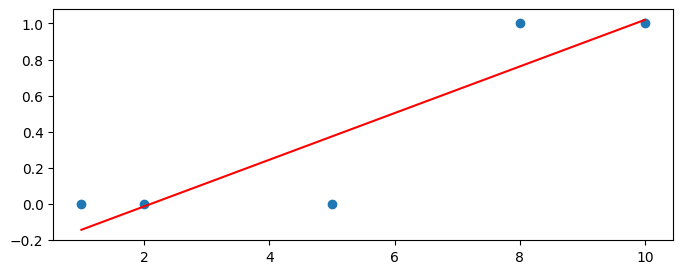

In [69]:
# 교안 35p.
from scipy import stats
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
x = np.array([1,2,5,8,10])
y = np.array([0,0,0,1,1])  # 실제값
lm = stats.linregress(x,y)   # 기울기(weight, slope)와 절편(bias, intercept)
lm[0],lm[1]  # W와 bias
H = lm[0] * x + lm[1]  # 예측값
plt.scatter(x,y)
plt.plot(x,H,'r')
plt.show()

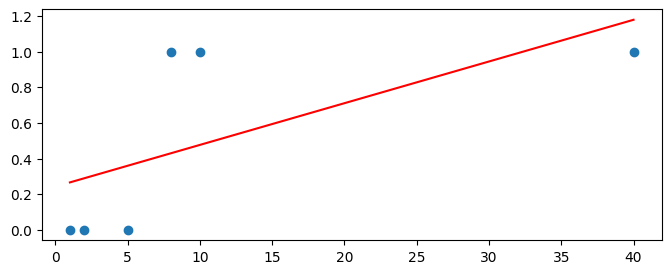

In [70]:
plt.figure(figsize=(8,3))
x = np.array([1,2,5,8,10,40])
y = np.array([0,0,0,1,1,1])  # 실제값
lm = stats.linregress(x,y)   # 기울기(weight, slope)와 절편(bias, intercept)
lm[0],lm[1]  # W와 bias
H = lm[0] * x + lm[1]  # 이진뷴류에서는 시그모이드와 같은 활성함수를 입혀서 예측값으로
plt.scatter(x,y)
plt.plot(x,H,'r')
plt.show()

In [4]:
# 교안 46p
x_data = np.array([[10,0],   # @(w1) =y_data
                   [ 8,1],   #   w2
                   [ 3,3],
                   [ 2,3],
                   [ 5,1],
                   [ 2,0],
                   [ 1,0]])
y_data = np.array([[1],[1],[1],[1],[0],[0],[0]])
# X, y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 독립(입력)변수 2개 -> 타겟(출력)변수 1개인 weight & bias

W = tf.Variable(tf.random_normal([2,1]))  # 독립변수갯수(입력), 종속변수갯수(출력)   3행2열@2행2열=3행2열
b = tf.Variable(tf.random_normal([1]))

# Hypothesis(예측값)
logits = tf.matmul(X, W) + b   # X@W + b : 시그모이드 활성화 함수 직전
H = tf.sigmoid(logits)   # 시그모이드 함수로 예측값에 시그모이드를 입힌다.

# cost
# cost = tf.reduce_mean(tf.square(H - y))   # 0.2~0.3의 값 미분의 의미가 없다.
# sigmoid 활성화함수를 입히면 위와 같은 cost는 작아져서 gradient 엄청 작아져
# 학습이 제대로 진행 안됨, 그래서 loss function을 cross entropy사용
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(cost)  # 미분의 값이 작아지는 방향으로 .. 하지만 0이 될 수는 없다.

# session 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, y:y_data})
    
    if step%1000==1:
        print("{}번째 cost: {}".format(step, cost_val))
print('최종 cost : ', cost_val)

1번째 cost: 1.449012041091919
1001번째 cost: 0.15202303230762482
2001번째 cost: 0.10702083259820938
3001번째 cost: 0.08193094283342361
4001번째 cost: 0.06595587730407715
5001번째 cost: 0.05499733239412308
6001번째 cost: 0.04706336930394173
7001번째 cost: 0.04107743501663208
8001번째 cost: 0.036412376910448074
9001번째 cost: 0.03268078714609146
최종 cost :  0.029634463


In [81]:
# accuracy( 정확도: 얼마나 맞췄는지 % )  correct의 평균
predict = tf.cast(H>=0.5,dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
#sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 :', sess.run(accuracy, feed_dict={X:x_data, y:y_data})*100, '%')

모델의 정확도 : 100.0 %


# 4. XOR
- 교안 62p
- 같으면 0, 다르면 1

In [9]:
# data set
x_data = np.array([[0,0], 
                   [0,1],
                   [1,0],
                   [1,1]])
y_data = np.array([[0],[1],[1],[0]])
# X & y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 입력2개 => 출력 1개인 W & b
W = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))

# Hypothesis(예측값)
logits = tf.matmul(X, W) + b   # X@W + b : 시그모이드 활성화 함수 직전
H = tf.sigmoid(logits)   # 시그모이드 함수로 예측값에 시그모이드를 입힌다.

# cost
# cost = tf.reduce_mean(tf.square(H - y))   # 0.2~0.3의 값 미분의 의미가 없다.
# sigmoid 활성화함수를 입히면 위와 같은 cost는 작아져서 gradient 엄청 작아져
# 학습이 제대로 진행 안됨, 그래서 loss function을 cross entropy사용
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)  # 미분의 값이 작아지는 방향으로 .. 하지만 0이 될 수는 없다.

# session 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, y:y_data})
    
    if step%1000==1:
        print("{}번째 cost: {}".format(step, cost_val))
print('최종 cost : ', cost_val)

1번째 cost: 0.8437531590461731
1001번째 cost: 0.7382791638374329
2001번째 cost: 0.7084822654724121
3001번째 cost: 0.6984496116638184
4001번째 cost: 0.6950627565383911
5001번째 cost: 0.6938750743865967
6001번째 cost: 0.6934372782707214
7001번째 cost: 0.6932674646377563
8001번째 cost: 0.6931986212730408
9001번째 cost: 0.6931696534156799
최종 cost :  0.6931572


In [11]:
# accuracy( 정확도: 얼마나 맞췄는지 % )  correct의 평균
predict = tf.cast(H>=0.5,dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
#sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 :', sess.run(accuracy, feed_dict={X:x_data, y:y_data})*100, '%')

모델의 정확도 : 50.0 %


# 5. Deep Learning : XOR
- X2 => 4 => 1  

In [14]:
# data set
x_data = np.array([[0,0], 
                   [0,1],
                   [1,0],
                   [1,1]])
y_data = np.array([[0],[1],[1],[0]])
# X & y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# layer1 : 입력 2 -> 출력 4인 W & b (입력층)
W1 = tf.Variable(tf.random_normal([2,4]))
b1 = tf.Variable(tf.random_normal([4]))
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# layer2 : 입력 4 -> 출력 1인 W & b (출력층)
W2 = tf.Variable(tf.random_normal([4,1]))
b2 = tf.Variable(tf.random_normal([1]))

# Hypothesis (예측)
logits = tf.matmul(layer1, W2) + b2
H = tf.sigmoid(logits)

# cost
# cost = tf.reduce_mean(tf.square(H - y))   # 0.2~0.3의 값 미분의 의미가 없다.
# sigmoid 활성화함수를 입히면 위와 같은 cost는 작아져서 gradient 엄청 작아져
# 학습이 제대로 진행 안됨, 그래서 loss function을 cross entropy사용
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)  # 미분의 값이 작아지는 방향으로 .. 하지만 0이 될 수는 없다.

# session 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, y:y_data})
    
    if step%1000==1:
        print("{}번째 cost: {}".format(step, cost_val))
print('최종 cost : ', cost_val)

1번째 cost: 1.277683138847351
1001번째 cost: 0.5902708768844604
2001번째 cost: 0.4408102333545685
3001번째 cost: 0.29334673285484314
4001번째 cost: 0.18932242691516876
5001번째 cost: 0.12493984401226044
6001번째 cost: 0.0869191586971283
7001번째 cost: 0.06367030739784241
8001번째 cost: 0.04884965345263481
9001번째 cost: 0.038869768381118774
최종 cost :  0.03186319


In [29]:
# accuracy( 정확도: 얼마나 맞췄는지 % )  correct의 평균
predict = tf.cast(H>=0.5,dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
#sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 :', sess.run(accuracy, feed_dict={X:x_data, y:y_data})*100, '%')

모델의 정확도 : 100.0 %


## layer층을 X2 => 10 => 20 => 10 => y1
-                   입력층     hiden layers    출력층      
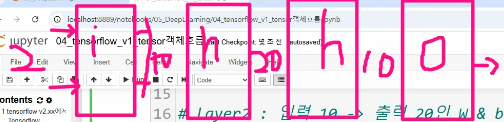

In [30]:
# data set
x_data = np.array([[0,0], 
                   [0,1],
                   [1,0],
                   [1,1]])
y_data = np.array([[0],[1],[1],[0]])
# X & y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# layer1 : 입력 2 -> 출력 10인 W & b (입력층)
W1 = tf.Variable(tf.random_normal([2,10]))
b1 = tf.Variable(tf.random_normal([10]))
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# layer2 : 입력 10 -> 출력 20인 W & b (hidden layer)
W2 = tf.Variable(tf.random_normal([10,20]))
b2 = tf.Variable(tf.random_normal([20]))
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

# layer3 : 입력 20 -> 출력 10인 W & b (hidden layer)
W3 = tf.Variable(tf.random_normal([20,10]))
b3 = tf.Variable(tf.random_normal([10]))
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

# layer4 : 입력 10 -> 출력 1인 W & b (출력층)
W4 = tf.Variable(tf.random_normal([10,1]))
b4 = tf.Variable(tf.random_normal([1]))

# Hypothesis (예측)
logits = tf.matmul(layer3, W4) + b4
H = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)  # 미분의 값이 작아지는 방향으로 .. 하지만 0이 될 수는 없다.

# session 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1,301):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, y:y_data})
    
    if step%100==1:
        print("{}번째 cost: {}".format(step, cost_val))
print('최종 cost : ', cost_val)

1번째 cost: 3.5950562953948975
101번째 cost: 0.006019302178174257
201번째 cost: 0.0026457123458385468
최종 cost :  0.0016181294


In [31]:
# accuracy( 정확도: 얼마나 맞췄는지 % )  correct의 평균
predict = tf.cast(H>=0.5,dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
#sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 :', sess.run(accuracy, feed_dict={X:x_data, y:y_data})*100, '%')

모델의 정확도 : 100.0 %


In [34]:
# 예측
sess.run(H, feed_dict={X:x.np.array([[0,0]])})

NameError: name 'x' is not defined

- 텐서플로우 v1릐 구조를 이해하기 위해
- 1. 입력값은 숫자로 들어와야하고
- 2. 행렬 연산후 내부적으로 float으로 변환된
